In [1]:
import tensorflow as tf

c:\users\heythere\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("../../Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../../Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../../Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ../../Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../../Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [5]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
mnist.train.num_examples

55000

In [7]:
mnist.test.num_examples

10000

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
single_image = mnist.train.images[1].reshape(28,28)

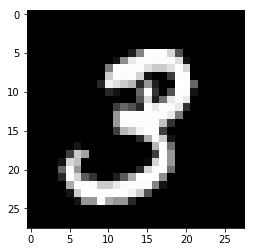

In [10]:
plt.imshow(single_image, cmap='gist_gray')

In [11]:
single_image.min()

0.0

In [12]:
single_image.max()

1.0

In [13]:
#PLACEHOLDERS
X = tf.placeholder(tf.float32, shape=[None, 784])

In [23]:
#VARIABLES
# initializer = tf.variance_scaling_initializer()
initializer = tf.random_uniform_initializer()

W1 = tf.Variable(initializer([784,155]), dtype=tf.float32)
b1 = tf.Variable(tf.zeros([155]), dtype=tf.float32)
a1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(initializer([155, 31]), dtype=tf.float32)
b2 = tf.Variable(tf.zeros([31]), dtype=tf.float32)
a2 = tf.nn.relu(tf.matmul(a1, W2) + b2)


W3 = tf.Variable(initializer([31,10]), dtype=tf.float32)
b3 = tf.Variable(tf.zeros([10]), dtype=tf.float32)
# a13 = tf.nn.relu(tf.matmul(a2, W3) + b3)
a13 = tf.matmul(a2, W3) + b3

In [24]:
#CREATE GRAPH OPERATION
y = a13

In [25]:
#LOSS FUNCTION
y_true = tf.placeholder(tf.float32, [None,10])

In [26]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y))

In [30]:
#OPTIMIZER
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
train = optimizer.minimize(cross_entropy)

In [31]:
# PREPARATION
init = tf.global_variables_initializer()
saver = tf.train.Saver() 

In [32]:
num_epochs = 100
batch_size = 150

try:
    with tf.Session() as sess:
        sess.run(init)

        # Epoch == Entire Training Set
        for epoch in range(num_epochs):
            num_batches = mnist.train.num_examples // batch_size

            # 150 batch size
            for iteration in range(num_batches):
                X_batch, y_batch = mnist.train.next_batch(batch_size)
                sess.run(train, feed_dict={X: X_batch, y_true:y_batch})

            training_loss = cross_entropy.eval(feed_dict={X: X_batch, y_true:y_batch})   
            print("Epoch {} Complete. Training Cost: {}".format(epoch,training_loss))
            saver.save(sess, "../save/mnist_wo_ae.ckpt")
            
            correct_prediction = tf.equal(tf.argmax(y,axis=1), tf.argmax(y_true,1))
            acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
            print(sess.run(acc, feed_dict={X:mnist.test.images, y_true:mnist.test.labels}))
            
except KeyboardInterrupt:
    print('Keyboard Interrupted')
finally:
    print('Finished Training the Model')

Epoch 0 Complete. Training Cost: 4.1348114013671875
0.549
Epoch 1 Complete. Training Cost: 2.660403251647949
0.6904
Epoch 2 Complete. Training Cost: 2.4192006587982178
0.7839
Epoch 3 Complete. Training Cost: 1.2401957511901855
0.7883
Epoch 4 Complete. Training Cost: 1.0033690929412842
0.8315
Epoch 5 Complete. Training Cost: 3.4402143955230713
0.7434
Epoch 6 Complete. Training Cost: 1.0141814947128296
0.8603
Epoch 7 Complete. Training Cost: 1.3287031650543213
0.8621
Epoch 8 Complete. Training Cost: 1.201291799545288
0.8535
Epoch 9 Complete. Training Cost: 1.1581193208694458
0.8694
Epoch 10 Complete. Training Cost: 0.7608135342597961
0.8943
Epoch 11 Complete. Training Cost: 1.1632561683654785
0.8772
Epoch 12 Complete. Training Cost: 1.0109062194824219
0.8818
Epoch 13 Complete. Training Cost: 0.8511311411857605
0.8465
Epoch 14 Complete. Training Cost: 0.9102868437767029
0.8746
Epoch 15 Complete. Training Cost: 0.9826450347900391
0.8636
Epoch 16 Complete. Training Cost: 2.007093906402588
0

In [ ]:
# 0.9811 accuracy .. 784, 155, 31, 10 reluss, softmax